# 连接google cloud

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!curl https://sdk.cloud.google.com | bash

流式输出内容被截断，只能显示最后 5000 行内容。
google-cloud-sdk/lib/surface/iot/devices/configs/list.yaml
google-cloud-sdk/lib/surface/iot/devices/configs/update.py
google-cloud-sdk/lib/surface/iot/devices/create.yaml
google-cloud-sdk/lib/surface/iot/devices/credentials/__init__.py
google-cloud-sdk/lib/surface/iot/devices/credentials/clear.py
google-cloud-sdk/lib/surface/iot/devices/credentials/create.py
google-cloud-sdk/lib/surface/iot/devices/credentials/delete.py
google-cloud-sdk/lib/surface/iot/devices/credentials/describe.py
google-cloud-sdk/lib/surface/iot/devices/credentials/list.py
google-cloud-sdk/lib/surface/iot/devices/credentials/update.py
google-cloud-sdk/lib/surface/iot/devices/delete.py
google-cloud-sdk/lib/surface/iot/devices/delete.yaml
google-cloud-sdk/lib/surface/iot/devices/describe.py
google-cloud-sdk/lib/surface/iot/devices/describe.yaml
google-cloud-sdk/lib/surface/iot/devices/gateways/__init__.py
google-cloud-sdk/lib/surface/iot/devices/gateways/bind.yaml
google-cloud-sdk/lib/surfa

In [ ]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'
core:
  account: yifanliuu@gmail.com

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

Choose the account you would like to use to perform operations for 
this configuration:
 [1] yifanliuu@gmail.com
 [2] Log in with a new account
Please enter your numeric choice:  1

You are logged in as: [yifanliuu@gmail.com].

This account has no projects.

Would you like 

In [ ]:
!gsutil cp gs://image-caption-dataset/Validation_GCC-1.1.0-Validation.tsv ./

Copying gs://image-caption-dataset/Validation_GCC-1.1.0-Validation.tsv...
/ [1 files][  2.5 MiB/  2.5 MiB]                                                
Operation completed over 1 objects/2.5 MiB.                                      


In [ ]:
!gsutil cp gs://image-caption-dataset/Train_GCC-training.tsv ./

Copying gs://image-caption-dataset/Train_GCC-training.tsv...
| [1 files][538.4 MiB/538.4 MiB]                                                
Operation completed over 1 objects/538.4 MiB.                                    


# Baseline


In [ ]:
import torch
import torchvision
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [ ]:
from skimage import iop

In [ ]:
plt.ion()

## Google conceptual captions Train dataset Representation

In [ ]:
train_frame = pd.read_csv('Train_GCC-training.tsv', sep='\t', header=None)

In [ ]:
train_frame.columns = ['description', 'url']
train_frame

,description,url
0,a very typical bus station,http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/...
1,sierra looked stunning in this top and this sk...,http://78.media.tumblr.com/3b133294bdc7c7784b7...
2,young confused girl standing in front of a war...,https://media.gettyimages.com/photos/young-con...
3,interior design of modern living room with fir...,https://thumb1.shutterstock.com/display_pic_wi...
4,cybernetic scene isolated on white background .,https://thumb1.shutterstock.com/display_pic_wi...
...,...,...
3318328,the teams line up for a photo after kick - off,https://i0.wp.com/i.dailymail.co.uk/i/pix/2015...
3318329,stickers given to delegates at the convention .,http://cdn.radioiowa.com/wp-content/uploads/20...
3318330,this is my very favourite design that i recent...,https://i.pinimg.com/736x/96/f0/77/96f07728efe...
3318331,man driving a car through the mountains,https://www.quickenloans.com/blog/wp-content/u...


In [ ]:
# help function: show the image and description
def show_image(image_url, description):
  image = io.imread(image_url)
  io.imshow(image)
  io.show()
  print(description)
  

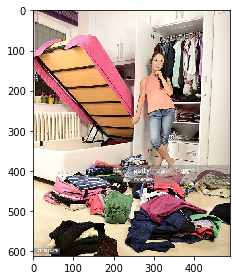

young confused girl standing in front of a wardrobe


In [ ]:
show_image(train_frame['url'][2], train_frame['description'][2])

## MS-COCO datatset Prepare

In [ ]:
!git clone https://github.com/pdollar/coco.git

fatal: destination path 'coco' already exists and is not an empty directory.
coco  sample_data


In [ ]:
%cd coco/PythonAPI/

/content/coco/PythonAPI


In [ ]:
!make
!python setup.py build
!python setup.py install

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/coco/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/usr/include/python3.6m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.6/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:

In [ ]:
%cd ../..

/


In [ ]:
!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip

--2020-10-19 09:47:51--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.112.75
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.112.75|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  47.0MB/s    in 5m 4s   

2020-10-19 09:52:55 (60.7 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]

--2020-10-19 09:52:55--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.138.163
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.138.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  59.6MB/s    in 11s     

2020-10-19 09:53:06 (67.9 MB/s) - 

In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2020-10-19 08:46:06--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.82.200
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.82.200|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  78.6MB/s    in 3.1s    

2020-10-19 08:46:10 (78.6 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [ ]:
!unzip train2017

流式输出内容被截断，只能显示最后 5000 行内容。
 extracting: train2017/000000381931.jpg  
 extracting: train2017/000000569592.jpg  
 extracting: train2017/000000229396.jpg  
 extracting: train2017/000000488990.jpg  
 extracting: train2017/000000348684.jpg  
 extracting: train2017/000000234031.jpg  
 extracting: train2017/000000563584.jpg  
 extracting: train2017/000000276069.jpg  
 extracting: train2017/000000401194.jpg  
 extracting: train2017/000000502089.jpg  
 extracting: train2017/000000192183.jpg  
 extracting: train2017/000000425127.jpg  
 extracting: train2017/000000126766.jpg  
 extracting: train2017/000000324161.jpg  
 extracting: train2017/000000452746.jpg  
 extracting: train2017/000000423782.jpg  
 extracting: train2017/000000546343.jpg  
 extracting: train2017/000000249290.jpg  
 extracting: train2017/000000025529.jpg  
 extracting: train2017/000000316928.jpg  
 extracting: train2017/000000337866.jpg  
 extracting: train2017/000000547768.jpg  
 extracting: train2017/000000423162.jpg  
 extrac

In [ ]:
!unzip val2017

流式输出内容被截断，只能显示最后 5000 行内容。
 extracting: val2017/000000231527.jpg  
 extracting: val2017/000000578922.jpg  
 extracting: val2017/000000062808.jpg  
 extracting: val2017/000000119038.jpg  
 extracting: val2017/000000114871.jpg  
 extracting: val2017/000000463918.jpg  
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/000000117492.jpg  
 extracting: val2017/000000368900.jpg  
 extracting: 

In [ ]:
!unzip annotations_trainval2017

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [ ]:
!rm *.zip

## Build a Vocab

In [ ]:
import spacy
from spacy.vocab import Vocab

In [ ]:
!python -m spacy download en_vectors_web_lg

     |████████████████████████████████| 661.8MB 63.9MB/s 
  Created wheel for en-vectors-web-lg: filename=en_vectors_web_lg-2.1.0-cp36-none-any.whl size=663461749 sha256=45762279ada838966873a60350520ec7b98399a238eb7d90535ce505dc6f2356
  Stored in directory: /tmp/pip-ephem-wheel-cache-ep6j5kkb/wheels/ce/3e/83/59647d0b4584003cce18fb68ecda2866e7c7b2722c3ecaddaf
Successfully built en-vectors-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_vectors_web_lg')


In [ ]:
import en_vectors_web_lg
nlp = en_vectors_web_lg.load()
threshold = 5 # 每个单词至少出现5次

In [ ]:
from pycocotools.coco import COCO
from collections import Counter
coco = COCO("./annotations/captions_train2017.json")
ids = list(sorted(coco.imgs.keys()))

loading annotations into memory...
Done (t=2.85s)
creating index...
index created!


In [ ]:
counter = Counter()

for i, id in enumerate(ids):
  ann_ids = coco.getAnnIds(imgIds=id)
  anns = coco.loadAnns(ann_ids)
  caption = str([ann['caption'] for ann in anns])
  tokens = list(nlp(caption.lower()))
  counter.update([t.text for t in tokens])

  if i % 1000 == 0:
    print('{}/{} tokenized.'.format(i, len(ids)))

0/118287 tokenized.
1000/118287 tokenized.
2000/118287 tokenized.
3000/118287 tokenized.
4000/118287 tokenized.
5000/118287 tokenized.
6000/118287 tokenized.
7000/118287 tokenized.
8000/118287 tokenized.
9000/118287 tokenized.
10000/118287 tokenized.
11000/118287 tokenized.
12000/118287 tokenized.
13000/118287 tokenized.
14000/118287 tokenized.
15000/118287 tokenized.
16000/118287 tokenized.
17000/118287 tokenized.
18000/118287 tokenized.
19000/118287 tokenized.
20000/118287 tokenized.
21000/118287 tokenized.
22000/118287 tokenized.
23000/118287 tokenized.
24000/118287 tokenized.
25000/118287 tokenized.
26000/118287 tokenized.
27000/118287 tokenized.
28000/118287 tokenized.
29000/118287 tokenized.
30000/118287 tokenized.
31000/118287 tokenized.
32000/118287 tokenized.
33000/118287 tokenized.
34000/118287 tokenized.
35000/118287 tokenized.
36000/118287 tokenized.
37000/118287 tokenized.
38000/118287 tokenized.
39000/118287 tokenized.
40000/118287 tokenized.
41000/118287 tokenized.
42000

In [ ]:
words = [word for word, cnt in counter.items() if cnt >= threshold]

In [ ]:
words.extend(['<start>', '<end>', '<unk>', '<pad>'])

In [ ]:
vocab = Vocab(strings=words)

In [ ]:
len(vocab.strings)

10282

In [ ]:
for word in words:
  vocab.set_vector(word, nlp.vocab.get_vector(word))

## Build a Dataloader

In [ ]:
train_path2data = "./train2017"
train_path2json = "./annotations/captions_train2017.json"

In [ ]:
from torchvision.datasets import VisionDataset
from PIL import Image
import os
import os.path


class CocoCaptionsDataset(VisionDataset):
  """`MS Coco Captions <http://mscoco.org/dataset/#captions-challenge2017>`_ Dataset.

  Args:
      root (string): Root directory where images are downloaded to.
      annFile (string): Path to json annotation file.
      transform (callable, optional): A function/transform that  takes in an PIL image
          and returns a transformed version. E.g, ``transforms.ToTensor``
      target_transform (callable, optional): A function/transform that takes in the
          target and transforms it.
      transforms (callable, optional): A function/transform that takes input sample and its target as entry
          and returns a transformed version.
  """

  def __init__(self, root, vocab, annFile, transform=None, target_transform=None, transforms=None):
    super(CocoCaptionsDataset, self).__init__(root, transforms, transform, target_transform)
    from pycocotools.coco import COCO
    self.coco = COCO(annFile)
    self.ids = list(sorted(self.coco.imgs.keys()))
    self.vocab = vocab
    self.nlp = English()

  def __getitem__(self, index):
    """
    Args:
        index (int): Index

    Returns:
        tuple: Tuple (image, target). target is a list of captions for the image.
    """
    coco = self.coco
    img_id = self.ids[index]
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)

    tokens = self.nlp(str(anns).lower())
    caption = []
    caption.append(vocab.get_vector('<start>'))
    caption.extend([vocab.get_vector(token.text) for token in tokens])
    caption.append(vocab.get_vector('<end>'))
    target = torch.Tensor(caption)
    # target = [ for ann in anns]

    path = coco.loadImgs(img_id)[0]['file_name']

    img = Image.open(os.path.join(self.root, path)).convert('RGB')

    if self.transforms is not None:
        img, target = self.transforms(img, target)

    return img, target


  def __len__(self):
    return len(self.ids)

In [ ]:
train_dataset = CocoCaptionsDataset(root = train_path2data,
                        vocab = vocab, 
                        annFile = train_path2json,
                        transform=transforms.ToTensor())

loading annotations into memory...
Done (t=1.20s)
creating index...
index created!


In [ ]:
print('Number of samples: ', len(train_dataset))
img, target = train_dataset[3] # load 4th sample

print("Image Size: ", img.size())
print(target)
print("Target Size: ", target.size())

Number of samples:  118287
Image Size:  torch.Size([3, 425, 640])
tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.2493, -0.0062,  0.1473,  ...,  0.1556, -0.3026,  0.1891],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.2633, -0.0528,  0.0440,  ...,  0.1335, -0.1865,  0.2154],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])
Target Size:  torch.Size([164, 300])


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4)

## Model

In [ ]:
from torch import nn
from torchvision import models
from torch.nn.utils.rnn import pack_padded_sequence

In [ ]:
class Encoder(nn.Module):
  def __init__(self, embedding_size=300):
    '''
    Load thr pretrained net and replace the top layer
    '''
    super(Encoder, self).__init__()
    self.net = models.inception_v3(pretrained=True)
    for param in self.net.parameters():
      param.requires_grad = False
    self.net.fc = nn.Linear(self.net.fc.in_features, embedding_size)
    self.bn = nn.BatchNorm1d(embedding_size, momentum=0.01)
    self.init_weights()

  def init_weights(self):
    self.net.fc.weight.data.normal_(0, 0.02)
    self.net.fc.bias.data.fill_(0)

  def forward(self, images):
    out = self.net(images)
    out = self.bn(out)
    return out

In [ ]:
class Decoder(nn.Module):
  def __init__(self, hidden_size, vocab_size, num_layers, embedding_size=300):
    super(Decoder, self).__init__()
    self.lstm = nn.LSTM(embedding_size, hidden_size, num_layers, batch_first = True)
    self.linear = nn.Linear(hidden_size, vocab_size)
    self.init_weights()
  
  def init_weights(self):
    self.linear.weight.data.uniform_(-0.1, 0.1)
    self.linear.bias.data.fill_(0)

  def forward(self, img_features, captions, lengths):
    embeddings = torch.cat((features.unsqueeze(1), captions), 1)
    padded = pack_padded_sequence(embedding_size, lengths, batch_first=True)
    hiddens, _ = self.lstm(padded)
    outputs = self.linear(hiddens[0])
    return outputs

  def inference(Self, img_features, vocab, states):
    sample_ids = []
    inputs = img_features.unsqueeze(1)
    for i in range(20):
      hiddens, states = self.lstm(input, states)
      outputs = self.linear(hidden.squeeze(1))
      predicted = output.max(1)[1]
      sample_ids.append(predicted)
      inputs = vocab.get_vectors(vocab.strings[predicted])
    sample_ids = torch.cat(sample_ids, 1)
    return sample_ids.squeeze()


## Train

In [ ]:
# Image preprocessing
transform = transforms.Compose([ 
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(), 
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
# Build the models
encoder = Encoder()
decoder = Decoder(hidden_size=512, vocab_size=len(vocab.strings), num_layers=1)

if torch.cuda.is_available():
    encoder.cuda()
    decoder.cuda()

In [ ]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
params = list(decoder.parameters()) + list(encoder.resnet.fc.parameters())
optimizer = torch.optim.Adam(params, lr=1e-3)

In [ ]:
# Train the Models
num_epochs = 20
total_step = len(data_loader)
for epoch in range(num_epochs):
  for i, (images, captions) in enumerate(data_loader):
      
    images = Variable(images)
    captions = Variable(captions)
    if torch.cuda.is_available():
        images = images.cuda()
        captions = captions.cuda()
    lengths = captions.shape[0]
    targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]
    
    # Forward, Backward and Optimize
    decoder.zero_grad()
    encoder.zero_grad()
    features = encoder(images)
    outputs = decoder(features, captions, lengths)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    # Print log info
    if i % args.log_step == 0:
        print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f, Perplexity: %5.4f'
              %(epoch, args.num_epochs, i, total_step, 
                loss.data[0], np.exp(loss.data[0]))) 
            
    # Save the models
    if (i+1) % args.save_step == 0:
        torch.save(decoder.state_dict(), 
                    os.path.join(args.model_path, 
                                'decoder-%d-%d.pkl' %(epoch+1, i+1)))
        torch.save(encoder.state_dict(), 
                    os.path.join(args.model_path, 
                                'encoder-%d-%d.pkl' %(epoch+1, i+1)))